In [1]:
%config Completer.use_jedi=False

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use("seaborn")

In [3]:
dfx=pd.read_csv(r'C:\Users\SWRAJ KANT SHARMA\Documents\Datasets\Logistic Regession\Chemical Segregation\Logistic_X_Train.csv')
dfx.head(n=10)

,f1,f2,f3
0,-1.239375,0.749101,-0.528515
1,-1.036070,0.801436,-1.283712
2,-0.615579,1.579521,-1.391927
3,1.335978,1.348651,1.433564
4,0.658925,1.300019,0.571603
5,0.656532,0.991440,0.870280
6,1.453978,0.583741,1.277378
7,1.124756,1.116124,1.442579
8,-1.723841,-0.175289,-0.588835
9,-0.794138,1.958963,-0.270497


In [4]:
print(dfx.shape)

(3000, 3)


In [5]:
dfx.isnull().sum()

f1    0
f2    0
f3    0
dtype: int64

In [6]:
dfy=pd.read_csv(r'C:\Users\SWRAJ KANT SHARMA\Documents\Datasets\Logistic Regession\Chemical Segregation\Logistic_Y_Train.csv')
dfy.head(n=10)

,label
0,1
1,1
2,1
3,0
4,0
5,0
6,0
7,0
8,1
9,1


In [7]:
X_Train=dfx.values

In [8]:
print(X_Train.shape)

(3000, 3)


In [9]:
Y_Train=dfy.values

In [10]:
print(Y_Train.shape)

(3000, 1)


In [11]:
### DAta Normalization
x_mean=X_Train.mean(axis=0)
x_std=X_Train.std(axis=0)

X_Train=(X_Train-x_mean)/x_std

In [12]:
print(X_Train)

[[-0.93471307 -0.24439694 -0.46140414]
 [-0.7823013  -0.19327286 -1.08586573]
 [-0.46707053  0.56681072 -1.17534766]
 ...
 [ 0.06059095  0.62470809 -1.83827342]
 [ 1.13777964 -0.13681202  1.22033571]
 [-0.74013008 -0.42526137 -1.29728616]]


### Implementaion

In [13]:
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))

def hypothesis(X,theta):
    """
    X-entire arary(m,n+1)
    theta-np.array(n+1,1)
    """
    return sigmoid(np.dot(X,theta))

def error(X,y,theta):
    """
    params:
    X-(m,n+1)
    y-(m,1)
    theta-(n+1,1)
    
    return:
       scalar_value=loss
    """
    hi=hypothesis(X,theta)
    e=-1*np.mean(y*np.log(hi)+((1-y)*np.log(1-hi)))
    
    return e

In [14]:
def gradient(X,y,theta):
    """
    params:
    X-(m,n+1)
    y-(m,1)
    theta-(n+1,1)
    return:
        gradient_vector-(n+1,1)
    """
    hi=hypothesis(X,theta)
    grad=-np.dot(X.T,(y-hi))
    m=X.shape[0]
    return grad/m
        
def gradient_descent(X,y,lr=0.5,max_itr=500):
    
    n=X.shape[1]
    theta=np.zeros((n,1))
    
    error_list=[]
    
    #Assignment-Change the Stopping Criteria
    # When change in error is very small,stop the loop
    for i in range(max_itr):
        err=error(X,y,theta)
        error_list.append(err)
        
        grad=gradient(X,y,theta)
        
        #Update
        theta=theta-lr*grad
        
    return (theta,error_list)

In [15]:
#  Adding the extra feature x0=1
ones=np.ones((X_Train.shape[0],1))
X_New_train=np.hstack((ones,X_Train))
print(X_New_train.shape)
#Everywhere we multiplied we assumed Y_train to be a column vector
Y_train=Y_Train.reshape((-1,1))

(3000, 4)


In [16]:
print(X_New_train)

[[ 1.         -0.93471307 -0.24439694 -0.46140414]
 [ 1.         -0.7823013  -0.19327286 -1.08586573]
 [ 1.         -0.46707053  0.56681072 -1.17534766]
 ...
 [ 1.          0.06059095  0.62470809 -1.83827342]
 [ 1.          1.13777964 -0.13681202  1.22033571]
 [ 1.         -0.74013008 -0.42526137 -1.29728616]]


In [17]:
theta,error_list=gradient_descent(X_New_train,Y_train)

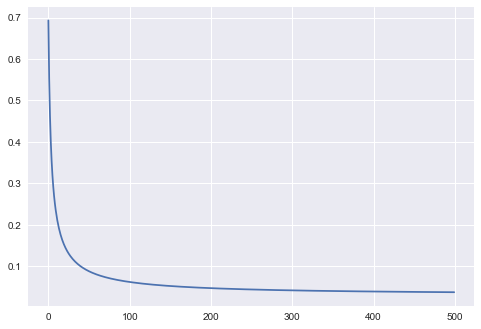

In [18]:
plt.plot(error_list)
plt.show()

In [19]:
theta

array([[-0.83262325],
       [-4.07340528],
       [ 2.48502446],
       [-2.85683045]])

### Predictions and Accuracy

In [19]:
df=pd.read_csv(r'C:\Users\SWRAJ KANT SHARMA\Documents\Datasets\Logistic Regession\Chemical Segregation\Logistic_X_Test.csv')

In [20]:
print(df.shape)

(1000, 3)


In [21]:
X_test=df.values

In [22]:
X_test=(X_test-x_mean)/x_std
print(X_test)

[[-0.58096727 -1.23196981 -2.10386172]
 [-0.93642077  0.43931113 -0.36596031]
 [ 1.43773502  0.91090225  1.08581064]
 ...
 [-0.89542577 -0.05073748 -0.67463414]
 [-0.40465638  0.8263143  -0.84593545]
 [ 0.39940977 -0.40861529  0.29533219]]


In [23]:
X_New_Test=np.hstack((np.ones((X_test.shape[0],1)),X_test))
print(X_New_Test.shape)

(1000, 4)


In [24]:
print(X_New_Test)

[[ 1.         -0.58096727 -1.23196981 -2.10386172]
 [ 1.         -0.93642077  0.43931113 -0.36596031]
 [ 1.          1.43773502  0.91090225  1.08581064]
 ...
 [ 1.         -0.89542577 -0.05073748 -0.67463414]
 [ 1.         -0.40465638  0.8263143  -0.84593545]
 [ 1.          0.39940977 -0.40861529  0.29533219]]


In [25]:
def predict(X,theta):
    h=hypothesis(X,theta)
    output=np.zeros(h.shape)
    
    output[h>=0.5]=1
    output=output.astype('int')
    return output

In [26]:
XT_pred=predict(X_New_train,theta)
Xt_pred=predict(X_New_Test,theta)

In [27]:
print(XT_pred.shape,Xt_pred.shape)

(3000, 1) (1000, 1)


In [28]:
def accuracy(actual,preds):
    actual=actual.astype('int')
    actual=actual.reshape((-1,1))
    
    acc=np.sum(actual==preds)/actual.shape[0]
    
    return acc

In [29]:
train_acc=accuracy(Y_train,XT_pred)
# test_acc=accuracy(Y_test,Xt_pred)

In [30]:
print(train_acc)

0.9946666666666667


In [31]:
print(Xt_pred)

[[1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]


In [32]:
print(Xt_pred.shape)

(1000, 1)


In [33]:
print(type(Xt_pred))

<class 'numpy.ndarray'>


In [34]:
df=pd.DataFrame(data=XT_pred,columns=["label"])

In [35]:
df.head(n=10)

,label
0,1
1,1
2,1
3,0
4,0
5,0
6,0
7,0
8,1
9,1


In [36]:
df.to_csv("submission.csv",index=False)